人間の顔の検出向けに作られたものでアニメ顔の検出はできるのか

分析を開始します...


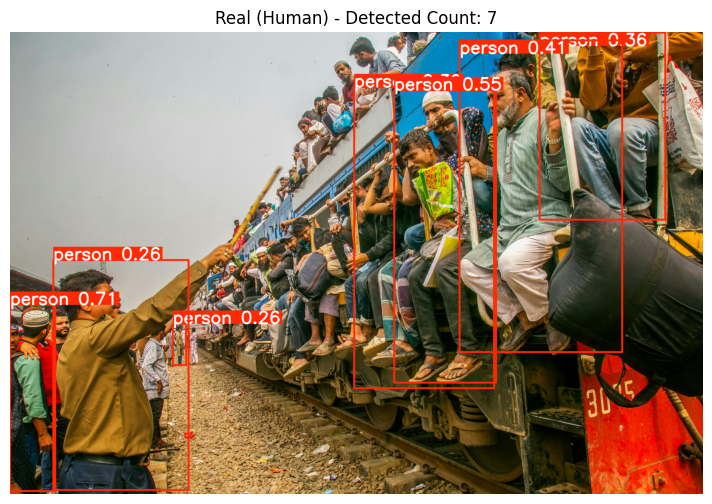

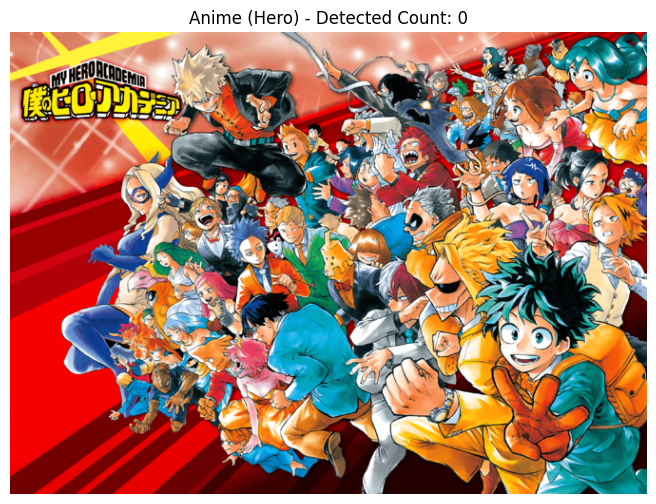


【最終結果】
実写の検出数: 7
アニメの検出数: 0


In [ ]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import os

real_img_path = 'human.jpg'
anime_img_path = 'anime.png'

def load_and_detect(path, title):

    if not os.path.exists(path):
        print(f"❌ エラー: '{path}' が見つかりません。")
        print(f"現在のフォルダにあるファイル: {os.listdir()}")
        return None


    img = cv2.imread(path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


    model = YOLO('yolov8n.pt') 
    results = model(img_rgb, conf=0.25, verbose=False)
    

    res_plotted = results[0].plot()
    count = len(results[0].boxes)


    plt.figure(figsize=(10, 6))
    plt.imshow(res_plotted)
    plt.title(f"{title} - Detected Count: {count}")
    plt.axis('off')
    plt.show()
    
    return count

print("分析を開始します...")
real_count = load_and_detect(real_img_path, "Real (Human)")
anime_count = load_and_detect(anime_img_path, "Anime (Hero)")

if real_count is not None and anime_count is not None:
    print(f"\n【最終結果】\n実写の検出数: {real_count}\nアニメの検出数: {anime_count}")

# 分析結果 


**実写**

密集しているかつ、重なっている人間の中ではあまり正確な精度は得られなかった。
しかし、人の大小にかかわらず検出することはできた。

**アニメ**

重なりの有無、人の大小にかかわらず検出することができなかった。


このことから、人間向けに作られているモデルであるため、キャラクター特有の大きな目や独特な髪形によって検出できなかったと考えられる。

# 役に立った点（強み）

処理が高速で、二秒もかからずに二枚の画像の人を検出した点

後ろ姿でもヒトと認識している点


# 限界を感じた点（弱み）

MTCNNは環境が整っていないからなのか使えなかった。

また、実写向けのモデルだったのでアニメのような非現実的な容姿のものにはそのままでは対応できない。

写真の出典

